# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

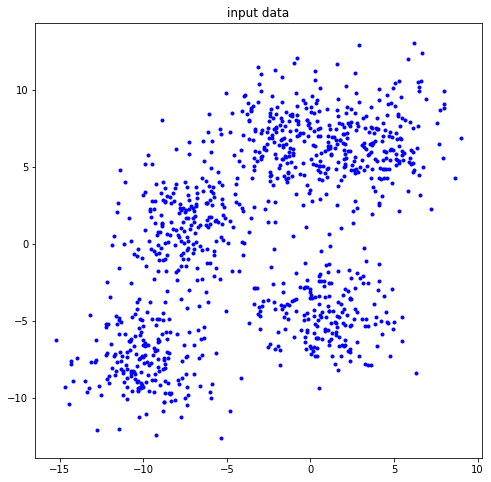

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.plot(x, y, '.', color = 'blue')

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [4]:
a = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
b = np.array([[1,1]])
print(a.shape, b.shape)
print(((a-b)**2))
print(np.sqrt(((a-b)**2).sum(axis=1)))

(5, 2) (1, 2)
[[ 0  0]
 [ 1  1]
 [ 4  4]
 [ 9  9]
 [16 16]]
[0.         1.41421356 2.82842712 4.24264069 5.65685425]


In [5]:
def compute_distance(feature, center):
    
    square_abs = (feature-center)**2
    value = square_abs.sum(axis=1)
    distance = np.sqrt(value)
    
    return distance

print(compute_distance(a,b))

[0.         1.41421356 2.82842712 4.24264069 5.65685425]


## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [6]:
print(feature.shape[0])
a = np.zeros(feature[0].shape)
print(feature[0])
print(a+feature[0]+feature[0])

1000
[-2.78158782  6.13851704]
[-5.56317564 12.27703408]


In [7]:
def compute_centroid(feature, label_feature, value_label):
    
    add = np.zeros(feature[0].shape);
    num = 0
    
    for i in range(feature.shape[0]):
        if(label_feature[i] == value_label):
            add = add + feature[i]
            num = num + 1
    
    centroid = (1/num)*add
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [8]:
a = np.array([[1,2],[2,4],[3,2],[5,2],[7,10],[1,12],[10,2]])
print(a.argmax(axis=1))
print(a.sum())

[1 1 0 0 1 1 0]
63


In [9]:
def compute_label(distance):
    
    label_feature = distance.argmin(axis=1)
    
    return label_feature


In [10]:
# assign the number of clusters and iterations
k = 10
max_iter = 100

number_cluster      = k
number_iteration    = max_iter
# ===================================================
print(number_data, number_cluster, number_feature, number_iteration)

1000 10 2 100


In [270]:
print(distance[0])
print(distance[0].min())
print(distance.min(axis=1).shape)
print(distance.min(axis=1).sum())

[15.66258694  5.3034156   6.40165209  8.39320627  9.36943059 12.90900092
 10.76590069  1.97719622  2.38571306  8.6786668 ]
1.9771962228237392
(1000,)
1963.2327794795938


In [268]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

for k in range(number_cluster):
    random_index = np.random.randint(0,number_data)
    centroid[k] = feature[random_index]
    distance[:, k] = compute_distance(feature, centroid[k])
    
label_feature = compute_label(distance)

print(centroid)
print(distance.shape)
print(label_feature.shape)

# initialize centroid and label_feature
# ==========================================================
#plot_cluster(feature, label_feature, 10)
print((1/distance.shape[0])*(1/distance.shape[1])*distance.sum())

[[-10.73049052  -8.39954964]
 [ -6.22187227   2.62976527]
 [  5.96617634   5.57908079]
 [  6.90749433   9.40323027]
 [  0.2977371   -3.47178948]
 [  1.82228343  -7.29213762]
 [ -3.39453048  -3.90645892]
 [ -3.40360029   2.35828272]
 [ -1.08121009   8.28091476]
 [ -5.36013202   0.41027138]]
(1000, 10)
(1000,)
10.130289083831752


In [269]:
for i in range(number_iteration):
    
    for k in range(number_cluster):
        centroid[k,:] = compute_centroid(feature, label_feature, k)  #update k_th centroid
        distance[:, k] = compute_distance(feature, centroid[k,:])   #compute distance from k_th centroid
    
    label_feature = compute_label(distance)   #update label(argmin distance)
    loss = (1/distance.shape[0])*distance.min(axis=1).sum()
    loss_iteration[i] = loss
    centroid_iteration[i] = centroid
    print("[%4d] loss = %5.5f" % (i, loss))
    print(centroid)
    

[   0] loss = 2.02762
[[-10.0892864   -7.65527375]
 [ -7.84602376   2.79246901]
 [  4.24133419   5.46910953]
 [  5.5626073    9.48699646]
 [  1.08948958  -3.28766695]
 [  2.09925972  -6.32762587]
 [ -3.68265948  -4.57995034]
 [ -2.09752348   3.58962424]
 [ -0.74301107   7.46561745]
 [ -7.28665205  -0.47780344]]
[   1] loss = 1.99899
[[-10.06696028  -7.71993997]
 [ -7.67495086   3.06474338]
 [  4.01316226   5.48852897]
 [  5.13741536   9.37042129]
 [  1.20343522  -3.08292041]
 [  2.01828446  -6.17841625]
 [ -3.17999799  -4.71161412]
 [ -1.96403291   3.92587021]
 [ -1.00809886   7.62027788]
 [ -7.65127731  -0.50572687]]
[   2] loss = 1.98574
[[-10.06826456  -7.76351728]
 [ -7.53383682   3.10174903]
 [  3.82011408   5.5575288 ]
 [  5.01245296   9.34151514]
 [  1.29343702  -2.97536264]
 [  1.98743103  -6.13088978]
 [ -2.96187784  -4.6797825 ]
 [ -1.77553568   4.10338556]
 [ -1.29129214   7.86315335]
 [ -7.83434211  -0.6068165 ]]
[   3] loss = 1.97585
[[-10.04955487  -7.75511977]
 [ -7.3999

[  30] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.05165466   2.99324341]
 [  3.60666118   5.72448304]
 [  4.99915893   9.28587966]
 [  1.37823249  -2.25684623]
 [  1.90513171  -5.88965675]
 [ -2.26510448  -4.61498763]
 [ -1.31093785   4.81696736]
 [ -1.72180168   8.27591736]
 [ -8.07296208  -0.74048114]]
[  31] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.05165466   2.99324341]
 [  3.60666118   5.72448304]
 [  4.99915893   9.28587966]
 [  1.37823249  -2.25684623]
 [  1.90513171  -5.88965675]
 [ -2.26510448  -4.61498763]
 [ -1.31093785   4.81696736]
 [ -1.72180168   8.27591736]
 [ -8.07296208  -0.74048114]]
[  32] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.05165466   2.99324341]
 [  3.60666118   5.72448304]
 [  4.99915893   9.28587966]
 [  1.37823249  -2.25684623]
 [  1.90513171  -5.88965675]
 [ -2.26510448  -4.61498763]
 [ -1.31093785   4.81696736]
 [ -1.72180168   8.27591736]
 [ -8.07296208  -0.74048114]]
[  33] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.0516

[  69] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.05165466   2.99324341]
 [  3.60666118   5.72448304]
 [  4.99915893   9.28587966]
 [  1.37823249  -2.25684623]
 [  1.90513171  -5.88965675]
 [ -2.26510448  -4.61498763]
 [ -1.31093785   4.81696736]
 [ -1.72180168   8.27591736]
 [ -8.07296208  -0.74048114]]
[  70] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.05165466   2.99324341]
 [  3.60666118   5.72448304]
 [  4.99915893   9.28587966]
 [  1.37823249  -2.25684623]
 [  1.90513171  -5.88965675]
 [ -2.26510448  -4.61498763]
 [ -1.31093785   4.81696736]
 [ -1.72180168   8.27591736]
 [ -8.07296208  -0.74048114]]
[  71] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.05165466   2.99324341]
 [  3.60666118   5.72448304]
 [  4.99915893   9.28587966]
 [  1.37823249  -2.25684623]
 [  1.90513171  -5.88965675]
 [ -2.26510448  -4.61498763]
 [ -1.31093785   4.81696736]
 [ -1.72180168   8.27591736]
 [ -8.07296208  -0.74048114]]
[  72] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.0516

[  96] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.05165466   2.99324341]
 [  3.60666118   5.72448304]
 [  4.99915893   9.28587966]
 [  1.37823249  -2.25684623]
 [  1.90513171  -5.88965675]
 [ -2.26510448  -4.61498763]
 [ -1.31093785   4.81696736]
 [ -1.72180168   8.27591736]
 [ -8.07296208  -0.74048114]]
[  97] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.05165466   2.99324341]
 [  3.60666118   5.72448304]
 [  4.99915893   9.28587966]
 [  1.37823249  -2.25684623]
 [  1.90513171  -5.88965675]
 [ -2.26510448  -4.61498763]
 [ -1.31093785   4.81696736]
 [ -1.72180168   8.27591736]
 [ -8.07296208  -0.74048114]]
[  98] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.05165466   2.99324341]
 [  3.60666118   5.72448304]
 [  4.99915893   9.28587966]
 [  1.37823249  -2.25684623]
 [  1.90513171  -5.88965675]
 [ -2.26510448  -4.61498763]
 [ -1.31093785   4.81696736]
 [ -1.72180168   8.27591736]
 [ -8.07296208  -0.74048114]]
[  99] loss = 1.96323
[[-10.01052899  -7.75605166]
 [ -7.0516

In [273]:
def find_centroid(num, max_iter):
    number_cluster      = num
    number_iteration    = max_iter
    distance            = np.zeros(shape=(number_data, number_cluster))
    centroid            = np.zeros(shape=(number_cluster, number_feature))
    loss_iteration      = np.zeros(shape=(number_iteration, 1))
    centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

    for k in range(number_cluster):
        random_index = np.random.randint(0,number_data)
        centroid[k] = feature[random_index]
        distance[:, k] = compute_distance(feature, centroid[k])

    label_feature = compute_label(distance)
    plot_cluster(feature, label_feature, num, centroid)
    print((1/distance.shape[0])*(distance.min(axis=1).sum()))
    
    for i in range(number_iteration):
        loss = (1/distance.shape[0])*(distance.min(axis=1).sum())
        loss_iteration[i] = loss
        centroid_iteration[i] = centroid
        print("[%4d] loss = %5.5f" % (i, loss))
        print(centroid)
        
        for k in range(number_cluster):
            centroid[k,:] = compute_centroid(feature, label_feature, k)  #update k_th centroid
            distance[:, k] = compute_distance(feature, centroid[k,:])   #compute distance from k_th centroid

        label_feature = compute_label(distance)   #update label(argmin distance)
        
    return centroid, loss_iteration, centroid_iteration, label_feature

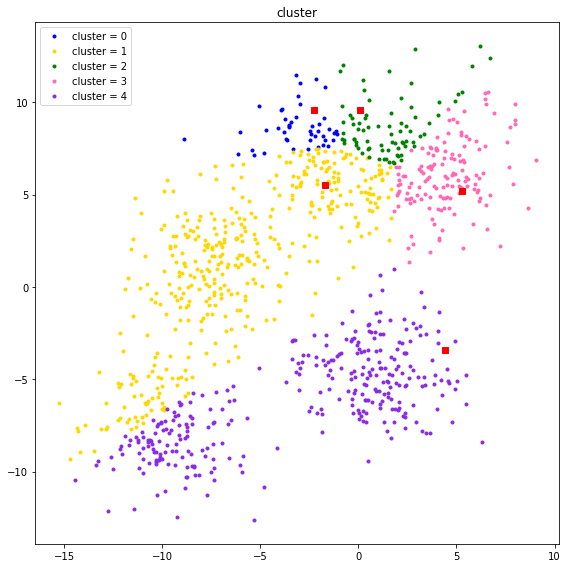

6.171748485843959
[   0] loss = 6.17175
[[-2.282088    9.58542319]
 [-1.68736352  5.5056244 ]
 [ 0.10133603  9.60506093]
 [ 5.29849223  5.22313088]
 [ 4.42008601 -3.40646354]]
[   1] loss = 3.90244
[[-3.13712639  8.66719048]
 [-6.02710411  1.35028611]
 [ 1.54574373  8.74303553]
 [ 4.54093625  6.00353678]
 [-3.11252938 -6.15161043]]
[   2] loss = 3.70372
[[-2.64155797  7.07692495]
 [-7.39460846  0.9380125 ]
 [ 1.36309911  7.86982568]
 [ 4.11503083  5.52538247]
 [-4.38747461 -6.25413103]]
[   3] loss = 3.69622
[[-2.6233878   6.63551545]
 [-7.67724838  0.78071825]
 [ 1.45197412  7.86893575]
 [ 4.22413715  5.00050108]
 [-4.62105223 -6.35250858]]
[   4] loss = 3.69983
[[-2.67243876  6.44524272]
 [-7.80768347  0.73659584]
 [ 1.75938883  7.93680138]
 [ 4.1289099   4.44930925]
 [-4.71714361 -6.4086102 ]]
[   5] loss = 3.69889
[[-2.61388434  6.40127957]
 [-7.8460621   0.7183929 ]
 [ 2.16386606  8.06489355]
 [ 3.97154135  3.87682635]
 [-4.83131007 -6.44742628]]
[   6] loss = 3.66202
[[-2.5421042

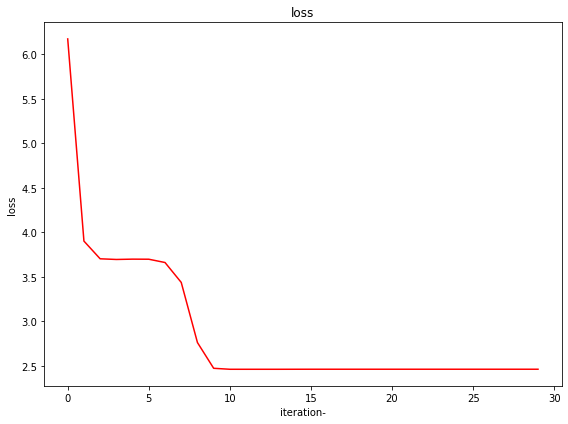

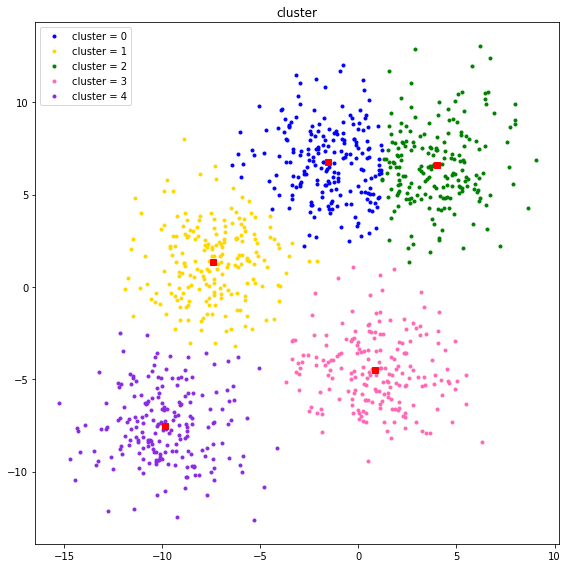

In [291]:
centroid, loss_iteration, centroid_iteration, label_feature = find_centroid(5, 30)
plot_loss_curve(loss_iteration)
plot_cluster(feature, label_feature, 5, centroid)

In [86]:
#plot_loss_curve(loss_iteration)
#plot_cluster(feature, label_feature, 5)
#print(loss_iteration)

## plot the results

In [275]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    plt.plot(feature[:,0], feature[:,1], '.', color = 'blue')
    
    
#plot_data(feature)

In [276]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    plt.plot(list(range(0,len(loss_iteration))), loss_iteration, '-', color = 'red')

    plt.xlabel('iteration-')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()
    
#plot_loss_curve(loss_iteration)
#print(loss_iteration)

In [277]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    num_data = centroid_iteration.shape[0]
    num_centroid = centroid_iteration.shape[1]
    
    colors = ['blue','gold','green','hotpink','blueviolet','aquamarine','gray','olive','indigo','chocolate','greenyellow','darkmagenta']
    
    for i in range(num_centroid - 1):    
        plt.plot(centroid_iteration[:,i,0], centroid_iteration[:,i,1], '-', color = colors[i], label = "class = "+str(i))
        plt.plot(centroid_iteration[0,i,0], centroid_iteration[0,i,1], 'o', color = 'blue')
        plt.plot(centroid_iteration[num_data-1,i,0], centroid_iteration[num_data-1,i,1], 's', color = 'red')
        
    i = num_centroid-1
    plt.plot(centroid_iteration[:,i,0], centroid_iteration[:,i,1], '-', color = colors[i], label = "class = "+str(i))
    plt.plot(centroid_iteration[0,i,0], centroid_iteration[0,i,1], 'o', color = 'blue', label = "initial")
    plt.plot(centroid_iteration[num_data-1,i,0], centroid_iteration[num_data-1,i,1], 's', color = 'red', label = "final")

    plt.legend()
    plt.tight_layout()
    plt.show()

#plot_centroid(centroid_iteration)

In [278]:
def plot_cluster(feature, label_feature, label_cluster, centroid):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    num_data = feature.shape[0]
    num_cluster = label_cluster
    colors = ['blue','gold','green','hotpink','blueviolet','aquamarine','gray','olive','indigo','chocolate','greenyellow','darkmagenta']

    point_x = feature[:,0]
    point_y = feature[:,1]

    for i in range(num_cluster):
        x_filt = point_x[label_feature[:] == i]
        y_filt = point_y[label_feature[:] == i]
        plt.plot(x_filt, y_filt, '.', color = colors[i], label = "cluster = "+str(i))
        plt.plot(centroid[i,0], centroid[i,1], 's', color = 'red')

    plt.legend()
    plt.tight_layout()
    plt.show()

#plot_cluster(feature, label_feature, 5)

In [279]:
print(centroid)

[[-7.41863797  1.33235634]
 [-9.86675897 -7.52143374]
 [-1.5358288   6.76943913]
 [ 0.86873053 -4.5026988 ]
 [ 4.05662534  6.59151053]]


***

# results

***

1. plot the input data

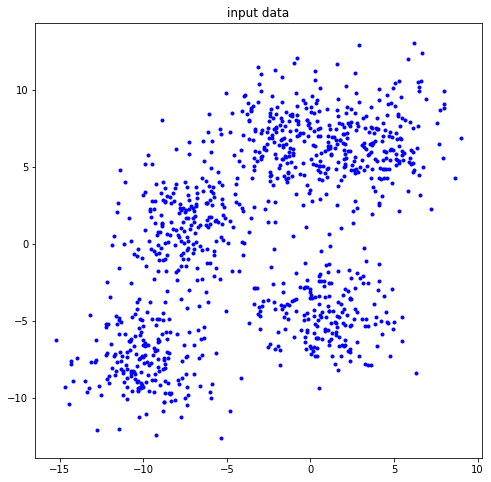

In [280]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

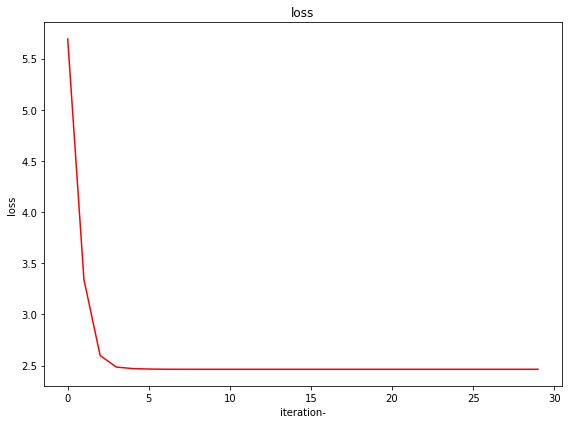

In [281]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

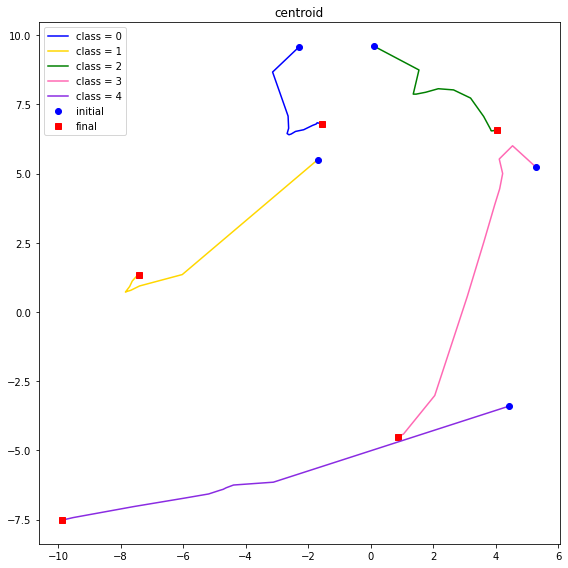

In [292]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

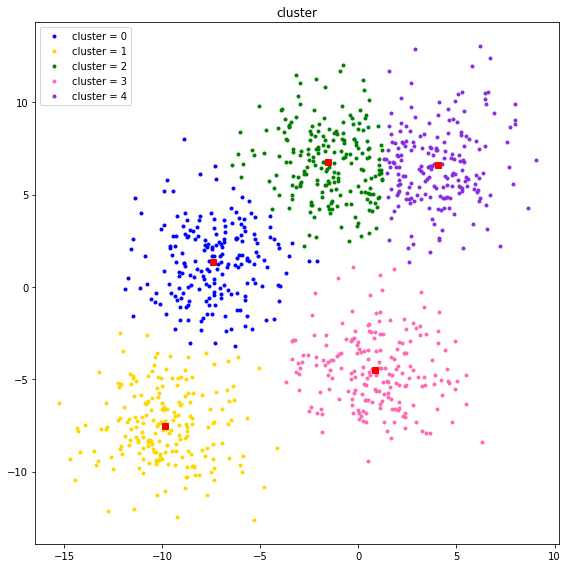

In [283]:
plot_cluster(feature, label_feature, 5, centroid)

***

5. plot the loss over the iterations with the number of clusters being 10

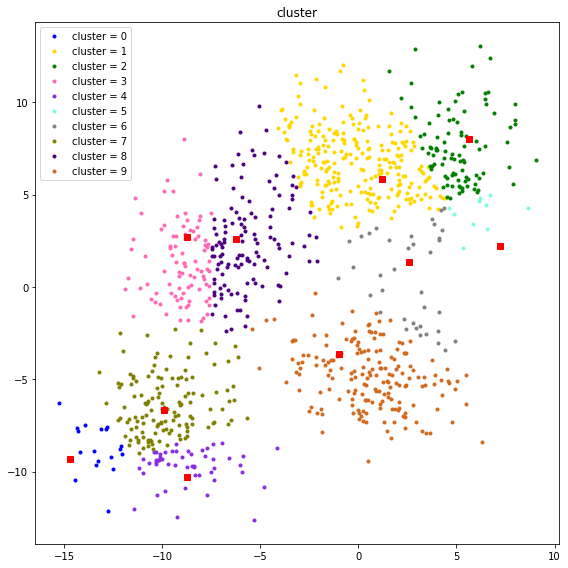

2.526141065064261
[   0] loss = 2.52614
[[-14.68285102  -9.29221594]
 [  1.22524472   5.82234657]
 [  5.6335294    8.00967967]
 [ -8.72919829   2.6944953 ]
 [ -8.76050937 -10.30604999]
 [  7.21487988   2.23579474]
 [  2.57334848   1.33095633]
 [ -9.89760529  -6.66222918]
 [ -6.23916496   2.62107658]
 [ -0.99039556  -3.63577946]]
[   1] loss = 2.18820
[[-13.38435788  -8.75350814]
 [ -0.08128223   6.77202087]
 [  5.07757065   7.69556585]
 [ -9.02860057   1.34893396]
 [ -8.69777212  -9.72365682]
 [  6.24250664   3.84400348]
 [  2.59126354   0.51359104]
 [ -9.7928062   -6.32242127]
 [ -5.65011552   2.5110643 ]
 [  0.55234197  -4.82175668]]
[   2] loss = 2.09286
[[-12.64543178  -8.45929246]
 [ -0.61594065   6.92505867]
 [  4.69686074   7.79433876]
 [ -8.68793512   0.90699017]
 [ -8.67172564  -9.38616528]
 [  5.10878392   4.50009428]
 [  2.06841579  -0.02462186]
 [ -9.66619157  -5.97510455]
 [ -5.46277236   2.61875366]
 [  0.70899258  -4.96660162]]
[   3] loss = 2.04680
[[-12.16253397  -8.41

[  27] loss = 1.96652
[[-11.40266045  -8.4179915 ]
 [ -1.73037137   7.25382912]
 [  4.55771147   8.41489615]
 [ -8.43066443   0.25430676]
 [ -7.87282445  -8.87097446]
 [  2.991643     5.03994388]
 [ -1.11581709  -3.47296222]
 [ -9.71476783  -5.19942251]
 [ -6.14399972   3.0354639 ]
 [  2.14568507  -5.23271328]]
[  28] loss = 1.96652
[[-11.40266045  -8.4179915 ]
 [ -1.73037137   7.25382912]
 [  4.55771147   8.41489615]
 [ -8.43066443   0.25430676]
 [ -7.87282445  -8.87097446]
 [  2.991643     5.03994388]
 [ -1.11581709  -3.47296222]
 [ -9.71476783  -5.19942251]
 [ -6.14399972   3.0354639 ]
 [  2.14568507  -5.23271328]]
[  29] loss = 1.96652
[[-11.40266045  -8.4179915 ]
 [ -1.73037137   7.25382912]
 [  4.55771147   8.41489615]
 [ -8.43066443   0.25430676]
 [ -7.87282445  -8.87097446]
 [  2.991643     5.03994388]
 [ -1.11581709  -3.47296222]
 [ -9.71476783  -5.19942251]
 [ -6.14399972   3.0354639 ]
 [  2.14568507  -5.23271328]]
[  30] loss = 1.96652
[[-11.40266045  -8.4179915 ]
 [ -1.7303

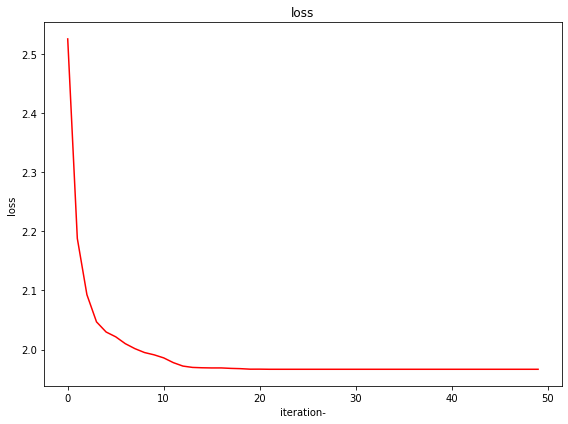

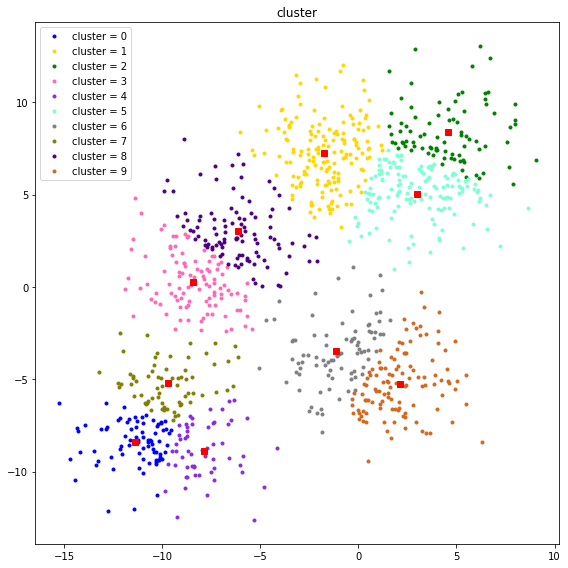

In [284]:
centroid, loss_iteration, centroid_iteration, label_feature = find_centroid(10, 50)
plot_loss_curve(loss_iteration)
plot_cluster(feature, label_feature, 10, centroid)
#print(loss_iteration)

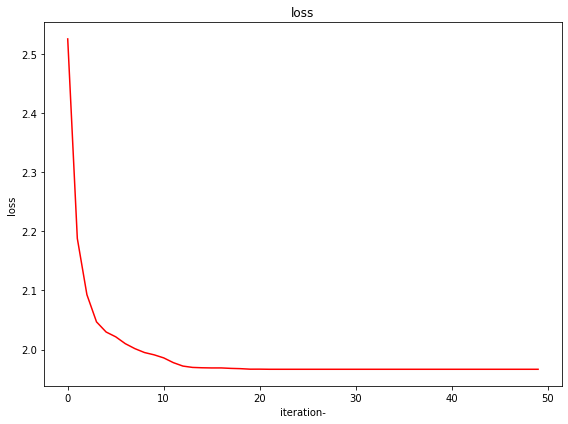

In [285]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

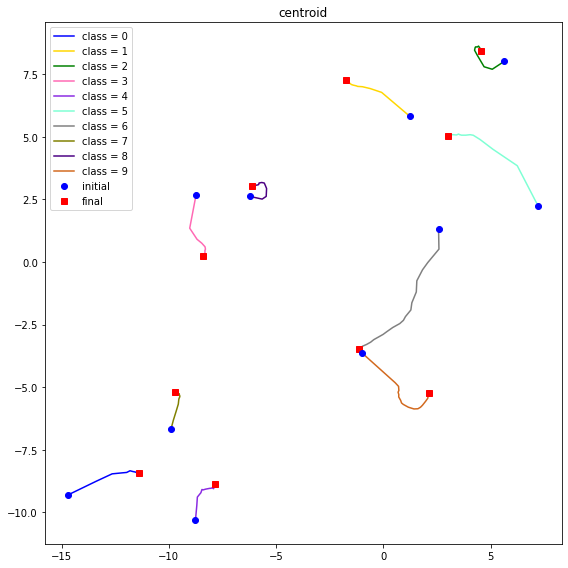

In [286]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

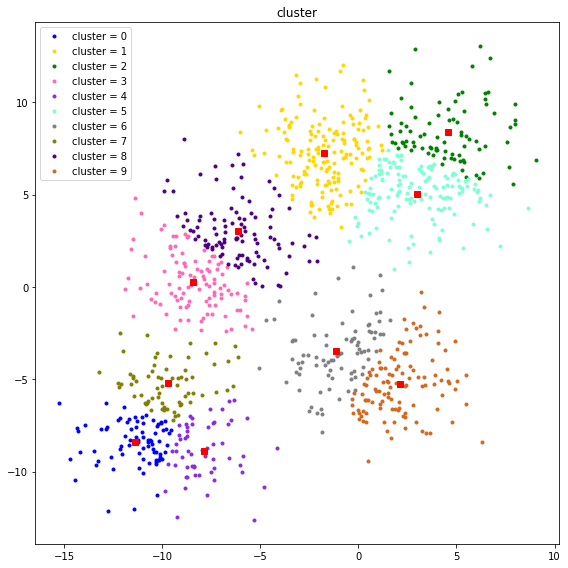

In [287]:
plot_cluster(feature, label_feature, 10, centroid)

***

In [290]:
print(distance.min(axis=1))

[1.97719622 1.2610107  2.06294944 2.46447118 1.49616075 1.80100003
 0.98066916 1.83947317 3.81834729 1.63265057 1.84261511 2.91719963
 0.35829836 1.86137969 0.65526959 2.99256924 1.93343796 2.32088733
 2.21208161 1.66960774 0.60116856 2.51605259 2.66463857 6.75604681
 1.3072633  1.10942388 3.12521565 0.83598778 1.31462954 0.88492722
 3.25021375 1.71482965 1.37877519 0.92176216 1.24790107 1.06677765
 1.70393751 1.20062751 2.5338436  1.06307387 1.27201447 1.30146324
 1.00363595 0.92463026 1.23921268 0.95757145 1.26540339 6.05073637
 2.25620339 1.2722737  1.76160768 1.83035091 2.40484494 2.80567612
 1.20135722 1.05666694 1.61828233 1.55723593 3.04069229 0.38853394
 2.95851214 2.38664269 2.28458804 1.52636667 2.88075305 2.33583246
 1.66035326 1.69945177 1.02721593 1.77878058 1.37528944 0.40512481
 1.02664561 3.94975576 1.28473399 2.77666159 0.55678778 1.09022799
 4.3280181  1.79337199 0.91970231 1.44866283 2.34717158 3.03943743
 1.49198665 1.19548938 1.670894   2.82442578 1.18928855 0.6889